In [1]:
# Test singular value decomposition in my image
# Also test image packeges like CV2

In [19]:
import numpy as np
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [92]:
# path 
path = '../dataset/arsat_1.jpg'
# Using cv2.imread() method in grayscale mode
img = cv2.imread(path,0)
cv2.imwrite(f"../images/arsat_b&w.jpg", img)


True

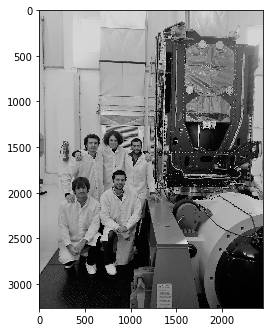

In [18]:
# trick to using plotly (avoid cv2 imshow in windows os)
plt_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,8))
imgplot = plt.imshow(plt_image)

In [13]:
# get image shape
print(f"Image shape: {img.shape}")

# Compute singular value decomposition
U, s, VT = svd(img)


Image shape: (3264, 2448)


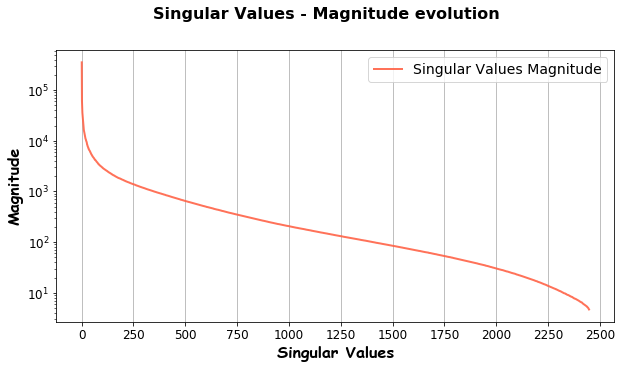

In [79]:
# plot evolution of singular values (asses dimensionality reduction)

fig = plt.figure(figsize=[10,5])
fig.suptitle('Singular Values - Magnitude evolution', size=16, weight='bold',y=1)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])

n_modes = 2448

x = np.linspace(1,len(s),len(s)).astype(int)
ax1.semilogy(x[:n_modes], s[:n_modes], ls='-', color ='tomato' , lw=2, alpha=0.9, label='Singular Values Magnitude')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
legend_prop = {'size':14,'weight':'ultralight'}
ax1.legend(prop=legend_prop)
label_prop = {'size':16,'weight':'bold','family':'fantasy'}
ax1.set_xlabel('Singular Values',fontdict=label_prop)
ax1.set_ylabel('Magnitude',fontdict=label_prop)


xlabels = np.arange(0,2501,250)
ax1.set_xticks(xlabels)
ax1.grid(axis='x')
# fig.savefig('../images/svd_evolution.png',dpi=800,bbox_inches='tight')


In [90]:

# Memory reduction applying SVD for compression
n_modes = 150
mem_red = n_modes*(img.shape[0]+img.shape[1])/(img.shape[0]*img.shape[1])*100
print(f"Image with {n_modes} SV, memory compression: {round(mem_red,2)} %")

comp_arrays = [np.tensordot(U[:,i],VT[i,:],axes=0)*s[i] for i in range(n_modes)]


Image with 150 SV, memory compression: 10.72 %


In [91]:
# save arrays as images through CV2
cv2.imwrite(f"../images/arsat_dec_{n_modes}.jpg", sum(comp_arrays))

True

In [93]:
# save reconstruction of ten first
for i in range(10):
    cv2.imwrite(f"../images/arsat_dec{i+1}.jpg", comp_arrays[i])

In [97]:
# save sum of first 10
cv2.imwrite(f"../images/arsat_dec_firsTen.jpg", sum(comp_arrays[:10]))

True